# Exercice 1

In [70]:
import cv2
import glob
import numpy as np
from PIL import Image, ImageEnhance
from matplotlib import pyplot as plt
from pathlib import Path

In [71]:
minion = Image.open('../resources/bob-mimon.jpg')

**Enhancing Brightness**

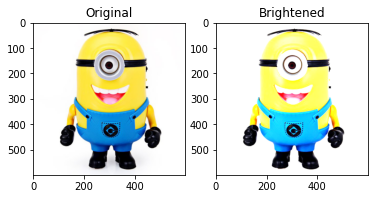

In [72]:
enhancer = ImageEnhance.Brightness(minion)
minion_bright = enhancer.enhance(1.5)

figure, axes = plt.subplots(1, 2)
axes[0].set_title('Original')
axes[0].imshow(minion)
axes[1].set_title('Brightened')
axes[1].imshow(minion_bright)

minion_bright.save('minion_bright.jpg')

**Enhancing Sharpness**

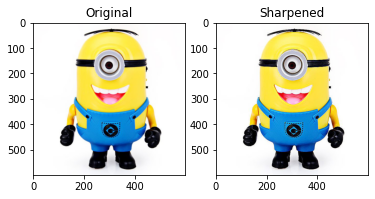

In [73]:
enhancer = ImageEnhance.Sharpness(minion)
minion_sharp = enhancer.enhance(5.0)

figure, axes = plt.subplots(1, 2)
axes[0].set_title('Original')
axes[0].imshow(minion)
axes[1].set_title('Sharpened')
axes[1].imshow(minion_sharp)

minion_sharp.save('minion_sharp.jpg')

**Enhancing Contrast**

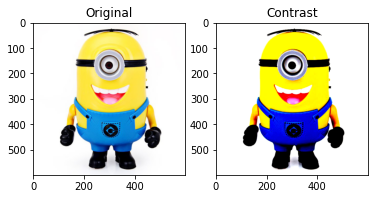

In [74]:
enhancer = ImageEnhance.Contrast(minion)
minion_contrast = enhancer.enhance(3.0)

figure, axes = plt.subplots(1, 2)
axes[0].set_title('Original')
axes[0].imshow(minion)
axes[1].set_title('Contrast')
axes[1].imshow(minion_contrast)

minion_contrast.save('minion_contrast.jpg')

**Enhancing Color**

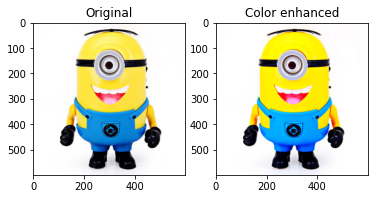

In [75]:
enhancer = ImageEnhance.Color(minion)
minion_color = enhancer.enhance(2.0)

figure, axes = plt.subplots(1, 2)
axes[0].set_title('Original')
axes[0].imshow(minion)
axes[1].set_title('Color enhanced')
axes[1].imshow(minion_color)

minion_color.save('minion_color.jpg')

# Exercice 2

In [76]:
minion = cv2.imread('../resources/bob-mimon.jpg')
minion_grey = cv2.cvtColor(minion, cv2.COLOR_BGR2GRAY)
minion_hsv = cv2.cvtColor(minion, cv2.COLOR_BGR2HSV)
minion_lab = cv2.cvtColor(minion, cv2.COLOR_BGR2LAB)

converted_path = Path().resolve() / 'converted'
converted_path.mkdir(exist_ok=True)

cv2.imwrite(str(converted_path / 'minion.jpg'), minion)
cv2.imwrite(str(converted_path / 'minion_grey.jpg'), minion_grey)
cv2.imwrite(str(converted_path / 'minion_rgb.jpg'), minion)
cv2.imwrite(str(converted_path / 'minion_hsv.jpg'), minion_hsv)
cv2.imwrite(str(converted_path / 'minion_lab.jpg'), minion_lab)

True

**Resizing a batch of images** 

In [77]:
paths = sorted(glob.glob(f'{Path().resolve()}/*.jpg'))

resized_path = Path().resolve() / 'resized'
resized_path.mkdir(exist_ok=True)

for path in paths:
    image = cv2.imread(path)
    resized = cv2.resize(image, (300, 300))
    cv2.imwrite(f'{resized_path}/resized_{Path(path).name}', resized)

# Exercice 3

In [78]:
def data_augmentation(paths: list[Path], angles: list[float]) -> None:
    '''
    Applies rotation on each image from paths by each angle of angles
    '''

    aug_path = Path().resolve() / 'augmentation'
    aug_path.mkdir(exist_ok=True)

    for path in paths:
        image = Image.open(path)
        for angle in angles:
            rotated = image.rotate(angle)
            rotated.save(f'{aug_path}/rotated_{int(angle)}_{Path(path).name}')

In [79]:
paths = sorted(glob.glob(f'{Path().resolve()}/*.jpg'))

nb_angles = int(input("Number of angles"))

angles = []
for i in range(nb_angles):
    angle = float(input(f"Value of angle n°{i + 1}"))
    angles.append(angle)


data_augmentation(paths, angles)